In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [3]:
data = pd.read_csv('./sf-crime/train.csv')
data.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [4]:
data.shape

(878049, 9)

In [5]:
data = data[['Category','Descript']]

In [6]:
data['Category'].value_counts()[:10].reset_index(name = 'Counts')

,Category,Counts
0,LARCENY/THEFT,174900
1,OTHER OFFENSES,126182
2,NON-CRIMINAL,92304
3,ASSAULT,76876
4,DRUG/NARCOTIC,53971
5,VEHICLE THEFT,53781
6,VANDALISM,44725
7,WARRANTS,42214
8,BURGLARY,36755
9,SUSPICIOUS OCC,31414


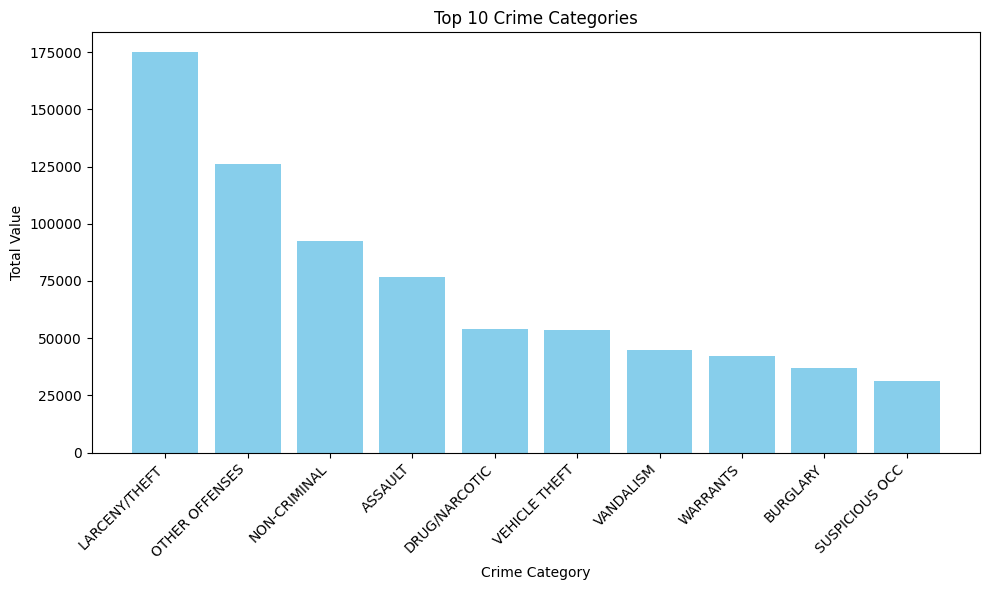

In [7]:
import matplotlib.pyplot as plt
top_10_crimes = data['Category'].value_counts()[:10].reset_index(name = 'Counts')

plt.figure(figsize=(10, 6))
plt.bar(top_10_crimes['Category'], top_10_crimes['Counts'], color='skyblue')
plt.xlabel('Crime Category')
plt.ylabel('Total Value')
plt.title('Top 10 Crime Categories')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

plt.show()


In [8]:
data['Descript'].value_counts()[:10]

Descript
GRAND THEFT FROM LOCKED AUTO                 60022
LOST PROPERTY                                31729
BATTERY                                      27441
STOLEN AUTOMOBILE                            26897
DRIVERS LICENSE, SUSPENDED OR REVOKED        26839
WARRANT ARREST                               23754
SUSPICIOUS OCCURRENCE                        21891
AIDED CASE, MENTAL DISTURBED                 21497
PETTY THEFT FROM LOCKED AUTO                 19771
MALICIOUS MISCHIEF, VANDALISM OF VEHICLES    17789
Name: count, dtype: int64

In [9]:
extra_stopwords = ['http', 'amp', 'rt', 't', 'c', 'the']
stopwords = extra_stopwords

In [10]:
lr_pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', LogisticRegression())
])


In [11]:
label_encoder = LabelEncoder()
label_encoder.fit(data['Category'])
data['label'] = label_encoder.transform(data['Category'])


In [12]:
data_train, data_test , y_train , y_test = train_test_split(data['Descript'],data['label'], test_size=0.2, random_state=42)

In [17]:
import time
start_time = time.time()
lr_pipeline.fit(data_train, y_train)
lr_predictions_train = lr_pipeline.predict(X_test)
lr_predictions_train = label_encoder.inverse_transform(lr_predictions_train)
end_time = time.time()
elapsed_time = end_time - start_time
print(elapsed_time)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


NameError: name 'X_test' is not defined

In [20]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import time

param_grid = {
    'vectorizer__max_features': [5000],
    'vectorizer__min_df': [5],
    'classifier__max_iter': [100],
    'classifier__C': [0.5]
}

# Create a StratifiedKFold object for cross-validation (you can adjust the number of folds)
c

# Create the GridSearchCV object
grid_search = GridSearchCV(lr_pipeline, param_grid, cv=cv, scoring='accuracy', n_jobs = 1)

# Initialize a list to store fold times
fold_times = []

# Loop through each fold
for i, (train_index, test_index) in enumerate(cv.split(data_train, y_train), 1):
    print(f"\nTraining Fold {i}")
    
    # Record start time
    start_time = time.time()
    
    # Fit the pipeline to the data and find the best parameters for the fold
    grid_search.fit(data_train.iloc[train_index], y_train.iloc[train_index])
    
    # Record end time
    end_time = time.time()
    
    # Calculate elapsed time for the fold
    elapsed_time = end_time - start_time
    fold_times.append(elapsed_time)
    
    # Print the best parameters and the corresponding accuracy for the fold
    print(f"Fold {i} - Best Parameters: {grid_search.best_params_}, Accuracy: {grid_search.best_score_:.2f}")
    print(f"Fold {i} - Elapsed Time: {elapsed_time:.2f} seconds")

# Print average time across all folds
average_time = sum(fold_times) / len(fold_times)
print(f"\nAverage Time Across Folds: {average_time:.2f} seconds")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(



Training Fold 1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

Fold 1 - Best Parameters: {'classifier__C': 0.5, 'classifier__max_iter': 100, 'vectorizer__max_features': 5000, 'vectorizer__min_df': 5}, Accuracy: 1.00
Fold 1 - Elapsed Time: 125.53 seconds

Training Fold 2


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

Fold 2 - Best Parameters: {'classifier__C': 0.5, 'classifier__max_iter': 100, 'vectorizer__max_features': 5000, 'vectorizer__min_df': 5}, Accuracy: 1.00
Fold 2 - Elapsed Time: 125.74 seconds

Training Fold 3


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

Fold 3 - Best Parameters: {'classifier__C': 0.5, 'classifier__max_iter': 100, 'vectorizer__max_features': 5000, 'vectorizer__min_df': 5}, Accuracy: 1.00
Fold 3 - Elapsed Time: 123.84 seconds

Training Fold 4


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

Fold 4 - Best Parameters: {'classifier__C': 0.5, 'classifier__max_iter': 100, 'vectorizer__max_features': 5000, 'vectorizer__min_df': 5}, Accuracy: 1.00
Fold 4 - Elapsed Time: 125.67 seconds

Training Fold 5


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

Fold 5 - Best Parameters: {'classifier__C': 0.5, 'classifier__max_iter': 100, 'vectorizer__max_features': 5000, 'vectorizer__min_df': 5}, Accuracy: 1.00
Fold 5 - Elapsed Time: 128.89 seconds

Average Time Across Folds: 125.94 seconds


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
best_model = grid_search.best_estimator_
y_train_pred = best_model.predict(data_train)
y_pred_test = best_model.predict(data_test)


In [14]:
test_lr_metrics = metrics.classification_report(y_train, y_train_pred ,target_names=data['Category'].unique())
print("Logistic Regression Train Metrics:")
print(test_lr_metrics)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Train Metrics:
                             precision    recall  f1-score   support

                   WARRANTS       1.00      1.00      1.00      1192
             OTHER OFFENSES       1.00      1.00      1.00     61512
              LARCENY/THEFT       1.00      1.00      1.00       334
              VEHICLE THEFT       1.00      1.00      1.00       231
                  VANDALISM       1.00      1.00      1.00     29366
               NON-CRIMINAL       1.00      1.00      1.00      3492
                    ROBBERY       1.00      1.00      1.00      1809
                    ASSAULT       1.00      1.00      1.00     43248
                WEAPON LAWS       1.00      1.00      1.00      3423
                   BURGLARY       1.00      1.00      1.00       944
             SUSPICIOUS OCC       1.00      1.00      1.00       205
                DRUNKENNESS       1.00      1.00      1.00       399
     FORGERY/COUNTERFEITING       1.00      1.00      1.00      851

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
test_lr_metrics = metrics.classification_report(y_test, y_pred_test, target_names=data['Category'].unique())
print("Logistic Regression Metrics:")
print(test_lr_metrics)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Metrics:
                             precision    recall  f1-score   support

                   WARRANTS       1.00      1.00      1.00       321
             OTHER OFFENSES       1.00      1.00      1.00     15364
              LARCENY/THEFT       1.00      1.00      1.00        72
              VEHICLE THEFT       1.00      1.00      1.00        58
                  VANDALISM       1.00      1.00      1.00      7389
               NON-CRIMINAL       1.00      1.00      1.00       828
                    ROBBERY       1.00      1.00      1.00       459
                    ASSAULT       1.00      1.00      1.00     10723
                WEAPON LAWS       1.00      1.00      1.00       857
                   BURGLARY       1.00      1.00      1.00       222
             SUSPICIOUS OCC       1.00      1.00      1.00        51
                DRUNKENNESS       1.00      0.98      0.99        92
     FORGERY/COUNTERFEITING       1.00      1.00      1.00      2092
    

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
